In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "/Users/carterwebb/Desktop/kelps/data/cleaned_data/"

bed_vars = [
    'Aiston_Preserve','Biz_Point','Cherry_Point_Gulf_Rd','Clallam_Bay','Coffin_Rocks',
    'Ebeys_Landing','Freshwater_Bay_1','Freshwater_Bay_2','Hat_Island','Hoypus_Point',
    'Lowell','Lummi_SW','North_Beach_East','Polnell_Point','Possession_Point',
    'Shannon_Point_East','Shannon_Point_West'
]

for var in bed_vars:
    globals()[var] = pd.read_csv(path + var + ".csv")

In [104]:
Ebeys_Landing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bed Name             27 non-null     object 
 1   Site Code            27 non-null     object 
 2   Survey Date          27 non-null     object 
 3   Survey Day           27 non-null     float64
 4   NWSC Max Ext         27 non-null     float64
 5   Survey Month         27 non-null     float64
 6   Survey Year          27 non-null     float64
 7   Acres                27 non-null     float64
 8   Temp                 18 non-null     float64
 9   Temp1 Shore Edge     9 non-null      float64
 10  Temp1 Water Edge     11 non-null     float64
 11  Temp2 Shore Edge     3 non-null      float64
 12  Temp2 Water Edge     4 non-null      float64
 13  Ave Temp Shore Edge  9 non-null      float64
 14  Ave Temp Water Edge  9 non-null      float64
 15  lat                  27 non-null     float

In [105]:
def fill_temperature(df):
    """
    Fills a new temperature column 'Temp_Final' using the following logic:
    
    1. If Temp exists → use Temp
    2. Else:
        a. If both Ave Temp Shore Edge and Ave Temp Water Edge exist:
              (Ave Temp Shore Edge + Ave Temp Water Edge) / 2
        b. Else:
              ((Temp1 Shore Edge + Temp2 Shore Edge)/2  +  
               (Temp1 Water Edge + Temp2 Water Edge)/2) / 2
    """

    df["Temp_Final"] = np.where(
        ~df["Temp"].isna(),                      # Case 1: Temp exists
        df["Temp"],                              # → use Temp

        np.where(
            (~df["Ave Temp Shore Edge"].isna()) &
            (~df["Ave Temp Water Edge"].isna()), # Case 2a: both average temps exist
            (df["Ave Temp Shore Edge"] + df["Ave Temp Water Edge"]) / 2,

            # Case 2b: fallback using Temp1/Temp2 averages
            (
                ((df["Temp1 Shore Edge"] + df["Temp2 Shore Edge"]) / 2) +
                ((df["Temp1 Water Edge"] + df["Temp2 Water Edge"]) / 2)
            ) / 2
        )
    )

    return df

In [106]:
fill_temperature(Ebeys_Landing)

,Bed Name,Site Code,Survey Date,Survey Day,NWSC Max Ext,Survey Month,Survey Year,Acres,Temp,Temp1 Shore Edge,Temp1 Water Edge,Temp2 Shore Edge,Temp2 Water Edge,Ave Temp Shore Edge,Ave Temp Water Edge,lat,lon,Temp_Final
0,Ebey's Landing,EBL,2015-06-14,14.0,0.0,6.0,2015.0,9.490754,11.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,11.00
1,Ebey's Landing,EBL,2015-07-19,19.0,0.0,7.0,2015.0,14.626063,13.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,13.00
2,Ebey's Landing,EBL,2015-08-15,15.0,1.0,8.0,2015.0,18.354044,13.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,13.00
3,Ebey's Landing,EBL,2015-09-26,26.0,0.0,9.0,2015.0,17.885642,12.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,12.00
4,Ebey's Landing,EBL,2016-06-25,25.0,0.0,6.0,2016.0,18.282310,14.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,14.00
5,Ebey's Landing,EBL,2016-07-22,22.0,1.0,7.0,2016.0,20.396699,12.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,12.00
6,Ebey's Landing,EBL,2016-08-19,19.0,0.0,8.0,2016.0,18.985232,13.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,13.00
7,Ebey's Landing,EBL,2017-06-26,26.0,0.0,6.0,2017.0,14.044818,11.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,11.00
8,Ebey's Landing,EBL,2017-07-25,25.0,0.0,7.0,2017.0,20.161350,12.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,12.00
9,Ebey's Landing,EBL,2017-08-23,23.0,0.0,8.0,2017.0,20.945903,13.0,NaN,NaN,NaN,NaN,NaN,NaN,48.183653,-122.70319,13.00


In [142]:
def max_corr(df):
    # 1. Select Max Extent only
    df_max = (df[df["NWSC Max Ext"] == 1]
      .sort_values(["Site Code", "Survey Year", "Acres"],
                   ascending=[True, True, False])
      .drop_duplicates(subset=["Site Code", "Survey Year"], keep="first")
      .copy()
    )

    df_max["PctAcreChange"] = (
        df_max.groupby("Site Code")["Acres"]
          .pct_change()
          * 100
    )
    
    # 2. Build lagged temp predictors *within each Site Code* ######### REPLACE WITH DATE OFFSET ############
    df_max["Temp_t"]        = df_max["Temp_Final"]
    df_max["Temp_t_minus1"] = df_max.groupby("Site Code")["Temp_Final"].shift(1)
    df_max["Temp_t_minus2"] = df_max.groupby("Site Code")["Temp_Final"].shift(2)
    df_max["Temp_t_minus3"] = df_max.groupby("Site Code")["Temp_Final"].shift(3)
    df_max["Temp_t_minus4"] = df_max.groupby("Site Code")["Temp_Final"].shift(4)
                                                             ######### REPLACE WITH DATE OFFSET ############

    
    # 2.1 Temp Imputation 
    temp_cols = ["Temp_t", "Temp_t_minus1", "Temp_t_minus2",
                 "Temp_t_minus3", "Temp_t_minus4"]

    monthly_avgs = (
        df_max.groupby(["Site Code", "Survey Month"])["Temp_Final"]
              .mean()
              .rename("MonthlyTempMean")
    )

    df_max = df_max.merge(monthly_avgs, on=["Site Code", "Survey Month"], how="left")

    for col in temp_cols:
        df_max[col] = df_max[col].fillna(df_max["MonthlyTempMean"])

    
    # 3. Predictor list
    predictor_variables = [
        "Temp_t", "Temp_t_minus1", "Temp_t_minus2", "Temp_t_minus3", "Temp_t_minus4"
    ]

    # 4. Numerical predictors
    numerical_predictors = (
        df_max[predictor_variables]
        .select_dtypes(include="number")
        .columns
        .to_list()
    )

    # 5. Correlation matrix with Acres appended
    corr_matrix = df_max[numerical_predictors + ["Acres", "PctAcreChange"]].corr()

    # Subset of columns to show
    selected_cols = [
        "Site Code", "Survey Day", "Survey Month", "Survey Year",
        "Acres", "Temp_t", "Temp_t_minus1", "Temp_t_minus2", "Temp_t_minus3", "Temp_t_minus4", "PctAcreChange"
    ]

    df_selected = df_max[selected_cols]
    
    # 6. Heatmap
    sns.heatmap(
        corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
    )
    plt.tick_params(labelsize=12)
    plt.title("Max Extent vs Temp Correlation Matrix", fontsize=14)
    plt.show()

    site = df_max["Site Code"].iloc[0]

    df_selected.to_csv(
        f"/Users/carterwebb/Desktop/kelps/data/cleaned_data/corr_dfs/{site}_corrDF.csv", index=False
    )

    return df_selected

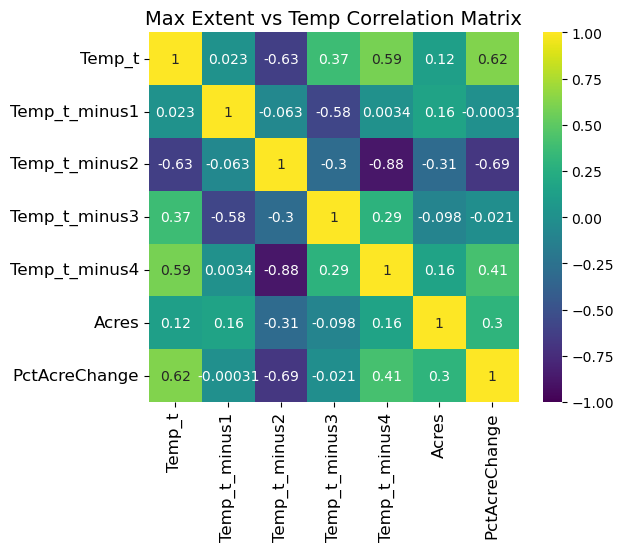

,Site Code,Survey Day,Survey Month,Survey Year,Acres,Temp_t,Temp_t_minus1,Temp_t_minus2,Temp_t_minus3,Temp_t_minus4,PctAcreChange
0,EBL,15.0,8.0,2015.0,18.354044,13.00,12.18125,12.18125,12.18125,12.18125,NaN
1,EBL,22.0,7.0,2016.0,20.396699,12.00,13.00000,12.00000,12.00000,12.00000,11.129181
2,EBL,16.0,9.0,2017.0,21.534815,11.00,12.00000,13.00000,11.00000,11.00000,5.579906
3,EBL,7.0,8.0,2018.0,21.293413,12.00,11.00000,12.00000,13.00000,12.18125,-1.120989
4,EBL,13.0,8.0,2019.0,41.131154,13.00,12.00000,11.00000,12.00000,13.00000,93.163749
5,EBL,30.0,8.0,2020.0,41.614620,11.95,13.00000,12.00000,11.00000,12.00000,1.175426
6,EBL,11.0,8.0,2021.0,37.681341,12.00,11.95000,13.00000,12.00000,11.00000,-9.451676
7,EBL,23.0,8.0,2022.0,38.629817,12.15,12.00000,11.95000,13.00000,12.00000,2.517096
8,EBL,14.0,8.0,2023.0,31.122627,12.00,12.15000,12.00000,11.95000,13.00000,-19.433665
9,EBL,20.0,8.0,2024.0,33.207906,11.35,12.00000,12.15000,12.00000,11.95000,6.700200


In [132]:
max_corr(Ebeys_Landing)

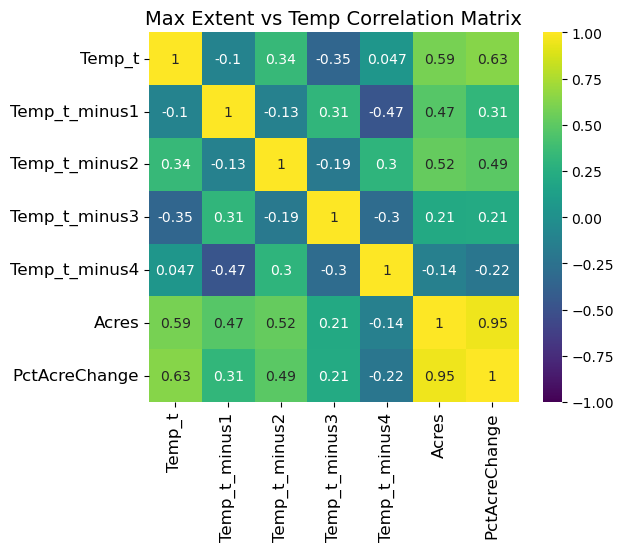

,Site Code,Survey Day,Survey Month,Survey Year,Acres,Temp_t,Temp_t_minus1,Temp_t_minus2,Temp_t_minus3,Temp_t_minus4,PctAcreChange
0,SHPT-E,15.0,9.0,2017.0,8.398104,14.000,13.116667,13.116667,13.116667,13.116667,NaN
1,SHPT-E,10.0,9.0,2018.0,10.128359,14.000,14.000000,13.116667,13.116667,13.116667,20.602937
2,SHPT-E,18.0,8.0,2019.0,12.096496,17.000,14.000000,14.000000,13.832500,13.832500,19.431941
3,SHPT-E,18.0,9.0,2020.0,8.583313,11.350,17.000000,14.000000,14.000000,13.116667,-29.042983
4,SHPT-E,20.0,8.0,2021.0,8.483059,13.330,11.350000,17.000000,14.000000,14.000000,-1.168013
5,SHPT-E,1.0,7.0,2022.0,5.374904,10.835,13.330000,11.350000,17.000000,14.000000,-36.639547
6,SHPT-E,4.0,8.0,2023.0,1.216887,12.800,10.835000,13.330000,11.350000,17.000000,-77.359844
7,SHPT-E,16.0,8.0,2024.0,0.390402,12.200,12.800000,10.835000,13.330000,11.350000,-67.918008


In [133]:
fill_temperature(Shannon_Point_East)
max_corr(Shannon_Point_East)

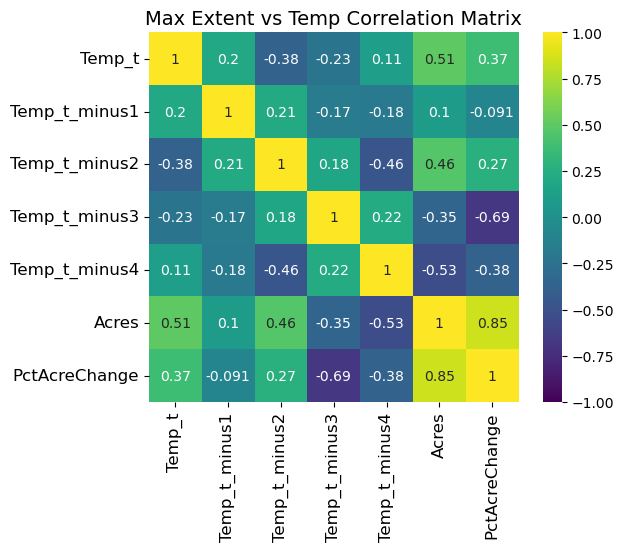

,Site Code,Survey Day,Survey Month,Survey Year,Acres,Temp_t,Temp_t_minus1,Temp_t_minus2,Temp_t_minus3,Temp_t_minus4,PctAcreChange
0,SHPT-W,15.0,9.0,2017.0,5.081829,12.000,12.649,12.649,12.649,12.649,NaN
1,SHPT-W,10.0,9.0,2018.0,9.818176,16.000,12.000,12.649,12.649,12.649,93.201636
2,SHPT-W,28.0,7.0,2019.0,4.414529,14.000,16.000,12.000,14.000,14.000,-55.037181
3,SHPT-W,18.0,9.0,2020.0,7.790410,11.400,14.000,16.000,12.000,12.649,76.472068
4,SHPT-W,19.0,9.0,2021.0,4.860296,10.695,11.400,14.000,16.000,12.000,-37.611814
5,SHPT-W,12.0,8.0,2022.0,3.267264,11.945,10.695,11.400,14.000,16.000,-32.776441
6,SHPT-W,1.0,9.0,2023.0,4.720687,13.150,11.945,10.695,11.400,14.000,44.484413
7,SHPT-W,16.0,8.0,2024.0,6.095017,12.200,13.150,11.945,10.695,11.400,29.112919


In [134]:
fill_temperature(Shannon_Point_West)
max_corr(Shannon_Point_West)

In [135]:
allbed = pd.read_csv("/Users/carterwebb/Desktop/kelps/data/cleaned_data/AllBeds_Clean.csv")

allbed[["Temp1 Shore Edge","Temp2 Shore Edge","Temp1 Water Edge","Temp2 Water Edge"]] = \
allbed[["Temp1 Shore Edge","Temp2 Shore Edge","Temp1 Water Edge","Temp2 Water Edge"]].apply(pd.to_numeric, errors="coerce")


allbed = allbed.sort_values(["Site Code", "Survey Year"])


allbed["PctAcreChange"] = (
    allbed.groupby("Site Code")["Acres"].pct_change() * 100
)

/var/folders/7s/t5l3pg4j2j54njys9zrdzdxr0000gn/T/ipykernel_64068/2128595762.py:11: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  allbed.groupby("Site Code")["Acres"].pct_change() * 100


In [136]:
allbed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 329
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bed Name             330 non-null    object 
 1   Site Code            330 non-null    object 
 2   Survey Date          330 non-null    object 
 3   Survey Day           330 non-null    float64
 4   NWSC Max Ext         329 non-null    float64
 5   Survey Month         330 non-null    float64
 6   Survey Year          330 non-null    float64
 7   Acres                328 non-null    float64
 8   Temp                 126 non-null    float64
 9   Temp1 Shore Edge     157 non-null    float64
 10  Temp1 Water Edge     171 non-null    float64
 11  Temp2 Shore Edge     82 non-null     float64
 12  Temp2 Water Edge     92 non-null     float64
 13  Ave Temp Shore Edge  159 non-null    float64
 14  Ave Temp Water Edge  170 non-null    float64
 15  lat                  330 non-null    float64


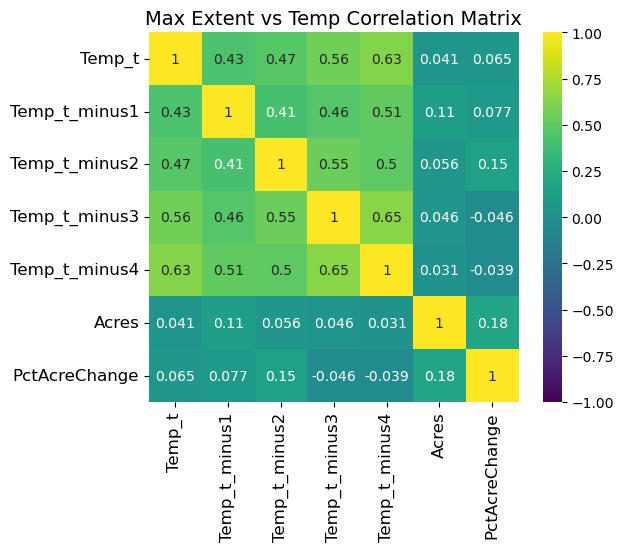

,Site Code,Survey Day,Survey Month,Survey Year,Acres,Temp_t,Temp_t_minus1,Temp_t_minus2,Temp_t_minus3,Temp_t_minus4,PctAcreChange
0,AISP,31.0,7.0,2018.0,0.117903,16.000,15.415,15.415,15.415,15.415,NaN
1,AISP,1.0,8.0,2019.0,0.167167,16.000,16.000,16.000,16.000,16.000,41.783878
2,AISP,20.0,7.0,2020.0,0.327542,15.150,16.000,16.000,15.415,15.415,95.936898
3,AISP,27.0,7.0,2021.0,0.207529,14.440,15.150,16.000,16.000,15.415,-36.640490
4,AISP,31.0,7.0,2022.0,0.296172,20.000,14.440,15.150,16.000,16.000,42.713633
...,...,...,...,...,...,...,...,...,...,...,...
132,SHPT-W,18.0,9.0,2020.0,7.790410,11.400,14.000,16.000,12.000,12.649,76.472068
133,SHPT-W,19.0,9.0,2021.0,4.860296,10.695,11.400,14.000,16.000,12.000,-37.611814
134,SHPT-W,12.0,8.0,2022.0,3.267264,11.945,10.695,11.400,14.000,16.000,-32.776441
135,SHPT-W,1.0,9.0,2023.0,4.720687,13.150,11.945,10.695,11.400,14.000,44.484413


In [143]:
fill_temperature(allbed)
max_corr(allbed)